In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## generate data

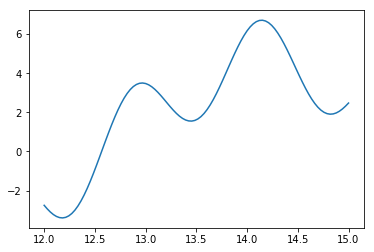

In [3]:
## generate data
t = np.linspace(12, 15, 100)
xs = t * np.sin(t) / 3 + 2 * np.sin(5*t)
plt.plot(t, xs)

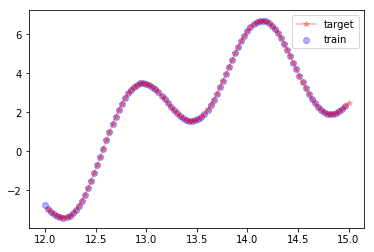

In [4]:
x_train = xs[:-1]
y_train = xs[1:]

plt.scatter(t[:-1], x_train, marker="o", label="train", c="blue", alpha=0.3)
plt.plot(t[1:], y_train, marker="*", label="target", c="red", alpha=0.3)
plt.legend(loc="best")

In [5]:
x_train.shape

(99,)

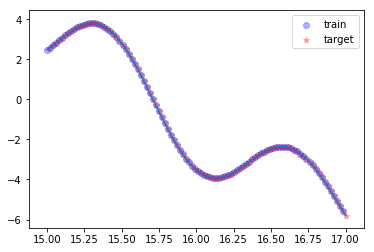

In [6]:
## generate data
t = np.linspace(15, 17, 100)
xs = t * np.sin(t) / 3 + 2 * np.sin(5*t)
plt.plot(t, xs)

x_test = xs[:-1]
y_test = xs[1:]

plt.scatter(t[:-1], x_test, marker="o", label="train", c="blue", alpha=0.3)
plt.scatter(t[1:], y_test, marker="*", label="target", c="red", alpha=0.3)
plt.legend(loc="best")

In [7]:
n = x_test.shape[0]
test_batches = zip(*[(x_test[i:i+20], y_test[i:i+20]) for i in range(n-19)])
x_test_batches, y_test_batches = map(lambda m: np.expand_dims(np.array(m), axis=2),
                                     test_batches)
x_test_batches.shape, y_test_batches.shape

((80, 20, 1), (80, 20, 1))

## build rnn

In [8]:
n = x_train.shape[0]
batches = zip(*[(x_train[i:i+20], y_train[i:i+20]) for i in range(n-19)])
x_batches, y_batches = map(lambda m: np.expand_dims(np.array(m), axis=2), batches)
x_batches.shape, y_batches.shape

((80, 20, 1), (80, 20, 1))

In [17]:
n_steps = 20
n_inputs = 1
n_hidden = 100
n_outputs = 1

n_epoches = 1000

with tf.device("/gpu:0"):

    tf.reset_default_graph()


    x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
    y = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

    with tf.name_scope("rnn"):
        cell = tf.contrib.rnn.LSTMCell(n_hidden, activation=tf.nn.relu, num_proj=1)
        outputs, states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
        #reshaped_outputs = tf.reshape(vec_outputs, [-1, n_hidden])
        #projected_outputs = tf.contrib.layers.fully_connected(reshaped_outputs, 1, activation_fn=None)
#         outputs = tf.reshape(projected_outputs, [-1, n_steps, n_outputs])

    with tf.name_scope("metrics"):
        loss = tf.reduce_mean(tf.square(y - outputs))


    with tf.name_scope("train_op"):
        optimizer = tf.train.AdamOptimizer()
        train_op = optimizer.minimize(loss)

In [18]:
config = tf.ConfigProto(allow_soft_placement=True, 
                        log_device_placement=True)

In [19]:
%%time

with tf.Session(config=config) as sess:
    tf.global_variables_initializer().run()
    for e in range(n_epoches):
        sess.run(train_op, feed_dict={x: x_batches, y: y_batches})
        if e % 100 == 0:
            loss_val = sess.run(loss, feed_dict={x:x_batches, y: y_batches})
            loss_test_val = sess.run(loss, feed_dict={x: x_test_batches, y: y_test_batches})
            print(loss_val, loss_test_val)
    yhat_val = outputs.eval(feed_dict={x: x_batches})
    yhat_test_val = outputs.eval(feed_dict={x: x_test_batches})

11.672 9.57426
1.003 1.17802
0.254108 0.362733
0.0574734 0.16829
0.027479 0.103029
0.0190403 0.0742475
0.0137711 0.0573842
0.0106633 0.0497203
0.00889149 0.0473394
0.00776864 0.0463191
CPU times: user 13.7 s, sys: 68 ms, total: 13.8 s
Wall time: 9.49 s


In [20]:
yhat = np.concatenate( (yhat_val[:-1,0,0], yhat_val[-1,:,0]) )
yhat_test = np.concatenate( (yhat_test_val[:-1,0,0], yhat_test_val[-1,:,0]) )
yhat.shape, yhat_test.shape

((99,), (99,))

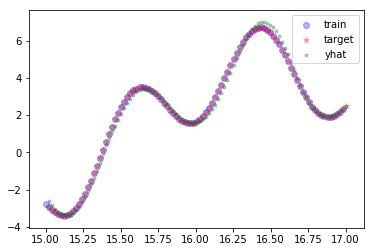

In [21]:
plt.scatter(t[:-1], x_train, marker="o", label="train", c="blue", alpha=0.3)
plt.scatter(t[1:], y_train, marker="*", label="target", c="red", alpha=0.3)
plt.scatter(t[1:], yhat, marker=".", label="yhat", c="green", alpha=0.3)
plt.legend(loc="best")

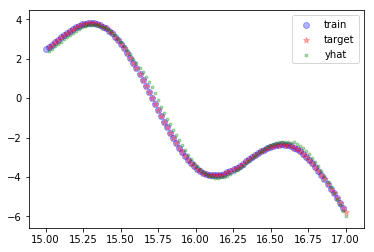

In [22]:
plt.scatter(t[:-1], x_test, marker="o", label="train", c="blue", alpha=0.3)
plt.scatter(t[1:], y_test, marker="*", label="target", c="red", alpha=0.3)
plt.scatter(t[1:], yhat_test, marker=".", label="yhat", c="green", alpha=0.3)
plt.legend(loc="best")

In [15]:
tf.contrib.rnn.MultiRNNCell?

In [16]:
import tensorflow as tf

tf.reset_default_graph()

with tf.device("/gpu:0"):
    a = tf.constant(2)
    b = tf.constant(1)
    c_val = (a+b).eval(session=tf.Session(), )
    print(c_val)

3


In [ ]:
tf.contrib.rnn.LSTMCell()

In [24]:
tf.nn.embedding_lookup_sparse?

In [25]:
tf.nn.sampled_softmax_loss?